## 0. Настройка окружения и импорт библиотек

В этом разделе подготавливается рабочее окружение для анализа данных и построения моделей машинного обучения.

- **NumPy** и **Pandas** используются для численных вычислений и обработки табличных данных.
- **Matplotlib** и **Seaborn** применяются для визуализации данных на этапе разведочного анализа (EDA).
- **scikit-learn** предоставляет инструменты для предобработки данных, построения моделей, оценки качества и организации ML-конвейера.

Из библиотеки scikit-learn импортируются:
- `train_test_split` — для разделения данных на обучающую и тестовую выборки.
- `StandardScaler` — для масштабирования числовых признаков.
- `OneHotEncoder` — для кодирования категориальных признаков.
- `ColumnTransformer` — для обработки смешанных типов признаков в едином конвейере.
- `Pipeline` — для построения воспроизводимого и структурированного ML-процесса.
- `classification_report` и `confusion_matrix` — для оценки качества классификационных моделей.

Фиксированное значение `random_state` используется для обеспечения воспроизводимости результатов.
Дополнительно настраивается отображение таблиц для удобства анализа.


In [15]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


# Настройки
RANDOM_STATE = 42
pd.set_option("display.max_columns", 100)

## 1. Загрузка исходных данных (OULAD)

В данном разделе выполняется загрузка всех таблиц из набора данных **Open University Learning Analytics Dataset (OULAD)**.
Файлы находятся в локальной директории `./OULAD/`.

Загружаемые таблицы:

- **studentInfo.csv** — демографические характеристики студентов и итоговый результат обучения (целевая переменная).
- **studentVle.csv** — журналы активности студентов в виртуальной обучающей среде (VLE), включая количество кликов и даты взаимодействий.
- **studentAssessment.csv** — информация о сдаче заданий студентами и полученных оценках.
- **assessments.csv** — метаданные по заданиям (тип, вес, сроки).
- **courses.csv** — сведения о курсах и их презентациях.
- **studentRegistration.csv** — данные о регистрации студентов на курсы.
- **vle.csv** — описание типов учебных ресурсов в виртуальной среде обучения.

Все файлы загружаются в объекты `pandas.DataFrame`, которые далее используются для объединения данных, разведочного анализа и построения моделей машинного обучения.


In [16]:
# Пути к файлам
base_path = "./OULAD/"

student_info = pd.read_csv(base_path + "studentInfo.csv")
student_vle = pd.read_csv(base_path + "studentVle.csv")
student_assessment = pd.read_csv(base_path + "studentAssessment.csv")
assessments = pd.read_csv(base_path + "assessments.csv")
courses = pd.read_csv(base_path + "courses.csv")
student_registration = pd.read_csv(base_path + "studentRegistration.csv")
vle = pd.read_csv(base_path + "vle.csv")

## 1.1 Первичный обзор структуры данных

На данном этапе выполняется первичная проверка загруженных таблиц набора данных OULAD.
Все датафреймы собираются в словарь для удобного последовательного просмотра.

Для каждой таблицы выводится:
- имя датасета;
- размерность (`shape`) — количество строк и столбцов;
- первые несколько строк (`head()`), чтобы понять структуру данных и типы признаков.

Этот шаг позволяет:
- убедиться, что данные загружены корректно;
- оценить масштаб каждой таблицы;
- предварительно определить ключевые поля для последующего объединения (merge);
- выявить потенциальные проблемы, такие как лишние столбцы или неожиданные типы данных.

Результаты этого обзора используются для планирования этапов агрегации, очистки данных и разведочного анализа (EDA).


In [17]:
datasets = {
    "student_info": student_info,
    "student_vle": student_vle,
    "student_assessment": student_assessment,
    "assessments": assessments,
    "courses": courses,
    "student_registration": student_registration,
    "vle": vle
}

for name, df in datasets.items():
    print(f"\n{name}")
    print("shape:", df.shape)
    display(df.head())
    print('\n\n\n')



student_info
shape: (32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass







student_vle
shape: (10655280, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1







student_assessment
shape: (173912, 5)


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79







assessments
shape: (206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0







courses
shape: (22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240







student_registration
shape: (32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?







vle
shape: (6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


## 1.2 Проверка структуры и типов данных (studentInfo)

В данном шаге используется метод `.info()` для анализа структуры таблицы `studentInfo`.

Вывод включает:
- общее количество строк и столбцов;
- названия признаков;
- типы данных каждого столбца;
- количество непустых значений;
- объём используемой памяти.

Этот анализ позволяет:
- определить числовые и категориальные признаки;
- выявить наличие пропущенных значений;
- проверить корректность типов данных перед дальнейшей обработкой;
- подтвердить наличие целевой переменной `final_result`.

Полученная информация используется при выборе методов предобработки данных и настройке `ColumnTransformer` на последующих этапах.


In [18]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


## 1.3 Распределение целевой переменной `final_result`

В данном шаге анализируется распределение значений целевой переменной `final_result`, которая отражает итоговый результат обучения студента.

Метод `value_counts(dropna=False)` используется для:
- подсчёта количества наблюдений в каждом классе;
- выявления возможных пропущенных значений;
- оценки степени дисбаланса между классами.

Этот анализ является критически важным, так как задача классификации основана на **несбалансированных данных**.
Полученные результаты напрямую влияют на:
- выбор метрик оценки качества моделей (precision, recall, F1-score);
- необходимость применения методов работы с дисбалансом классов (например, `class_weight` или SMOTE);
- интерпретацию итоговых результатов модели.

Информация о распределении классов учитывается на всех последующих этапах построения и оценки моделей машинного обучения.


In [19]:
student_info["final_result"].value_counts(dropna=False)

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

In [20]:
df = student_info.copy()

df.shape

(32593, 12)

## 2.1 Агрегация активности студентов в виртуальной обучающей среде (VLE)

Таблица `studentVle` содержит событийные данные, фиксирующие каждое взаимодействие студента с элементами виртуальной обучающей среды.
Для использования этих данных в моделях машинного обучения необходимо агрегировать их до уровня одного студента.

В данном шаге данные группируются по:
- идентификатору студента (`id_student`);
- модулю курса (`code_module`);
- презентации курса (`code_presentation`).

Для каждого студента рассчитываются следующие признаки:
- **`total_clicks`** — общее количество кликов по всем учебным ресурсам, отражающее общий уровень вовлечённости;
- **`mean_clicks`** — среднее количество кликов, характеризующее интенсивность активности;
- **`active_days`** — количество уникальных дней активности студента в системе.

Полученные агрегированные признаки используются далее как поведенческие характеристики студентов при построении моделей классификации.


In [21]:
# Общее число кликов по всем ресурсам
vle_agg = (
    student_vle
    .groupby(["id_student", "code_module", "code_presentation"], as_index=False)
    .agg(
        total_clicks=("sum_click", "sum"),
        mean_clicks=("sum_click", "mean"),
        active_days=("date", "nunique")
    )
)

vle_agg.head()


,id_student,code_module,code_presentation,total_clicks,mean_clicks,active_days
0,6516,AAA,2014J,2791,4.216012,159
1,8462,DDD,2013J,646,2.153333,56
2,8462,DDD,2014J,10,2.500000,1
3,11391,AAA,2013J,934,4.765306,40
4,23629,BBB,2013B,161,2.728814,16


## 2.2 Объединение данных об оценках с метаданными заданий

Таблица `studentAssessment` содержит информацию о выполнении заданий студентами, включая даты сдачи и полученные оценки.
Таблица `assessments` предоставляет дополнительные метаданные по каждому заданию, такие как тип задания, его вес и сроки выполнения.

На данном этапе выполняется объединение этих таблиц:
- по идентификатору задания `id_assessment`;
- с использованием левого соединения (`LEFT JOIN`), чтобы сохранить все записи о попытках сдачи заданий студентами.

Результатом является таблица `assess_full`, которая объединяет индивидуальные результаты студентов с характеристиками соответствующих заданий.
Эта таблица используется далее для агрегирования оценочных показателей и формирования признаков на уровне одного студента.


In [22]:
# Объединяем оценки с метаданными
assess_full = student_assessment.merge(
    assessments,
    on="id_assessment",
    how="left"
)

assess_full.head()


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78,AAA,2013J,TMA,19,10.0
1,1752,28400,22,0,70,AAA,2013J,TMA,19,10.0
2,1752,31604,17,0,72,AAA,2013J,TMA,19,10.0
3,1752,32885,26,0,69,AAA,2013J,TMA,19,10.0
4,1752,38053,19,0,79,AAA,2013J,TMA,19,10.0


## 2.3 Приведение типов данных в таблице оценок

Перед выполнением агрегирования оценочных показателей необходимо убедиться, что числовые признаки имеют корректный тип данных.

В данном шаге:
- столбец `score` приводится к числовому формату;
- столбец `date_submitted` также преобразуется в числовой тип.

Параметр `errors="coerce"` используется для обработки некорректных значений: все значения, которые невозможно преобразовать в число, автоматически заменяются на `NaN`.

Этот шаг позволяет:
- избежать ошибок при вычислении агрегированных статистик (например, среднего значения);
- корректно учитывать пропущенные или повреждённые данные;
- обеспечить стабильную работу последующих этапов агрегации и анализа.

Преобразование типов данных является важной частью процесса очистки данных и соответствует ста


In [23]:
assess_full["score"] = pd.to_numeric(
    assess_full["score"],
    errors="coerce"
)

assess_full["date_submitted"] = pd.to_numeric(
    assess_full["date_submitted"],
    errors="coerce"
)

## 2.4 Агрегация оценочных показателей студентов

После объединения данных по заданиям и приведения типов выполняется агрегирование оценочной информации до уровня одного студента.

Данные группируются по:
- идентификатору студента (`id_student`);
- модулю курса (`code_module`);
- презентации курса (`code_presentation`).

Для каждого студента рассчитываются следующие признаки:
- **`mean_score`** — средний балл по всем сданным заданиям;
- **`submitted_count`** — общее количество выполненных заданий;
- **`late_submissions`** — количество заданий, сданных с нарушением сроков (определяется по значению `date_submitted`).

Полученные агрегированные признаки отражают академическую успеваемость и дисциплину студентов и используются далее при объединении с демографическими и поведенческими данными для построения моделей классификации.


In [24]:
assess_agg = (
    assess_full
    .groupby(["id_student", "code_module", "code_presentation"], as_index=False)
    .agg(
        mean_score=("score", "mean"),
        submitted_count=("id_assessment", "count"),
        late_submissions=("date_submitted", lambda x: np.sum(x > 0))
    )
)

assess_agg.head()


,id_student,code_module,code_presentation,mean_score,submitted_count,late_submissions
0,6516,AAA,2014J,61.800000,5,5
1,8462,DDD,2013J,87.666667,3,3
2,8462,DDD,2014J,86.500000,4,0
3,11391,AAA,2013J,82.000000,5,5
4,23629,BBB,2013B,82.500000,4,4


## 2.5 Объединение агрегированных признаков с основной таблицей студентов

На данном этапе агрегированные признаки активности в виртуальной обучающей среде и оценочные показатели объединяются с основной таблицей студентов.

Объединение выполняется по следующим ключам:
- `id_student` — идентификатор студента;
- `code_module` — модуль курса;
- `code_presentation` — презентация курса.

Используется левое соединение (`LEFT JOIN`), что позволяет:
- сохранить всех студентов из основной таблицы `studentInfo`;
- корректно обработать случаи, когда у отдельных студентов отсутствуют данные об активности или оценках.

В результате формируется единый датасет `df`, в котором каждая строка соответствует одному студенту и содержит:
- демографические характеристики;
- показатели активности в VLE;
- агрегированные оценочные признаки;
- целевую переменную `final_result`.

Полученная таблица используется на следующих этапах для обработки пропущенных значений, разведочного анализа (EDA) и построения моделей машинного обучения.


In [25]:
df = df.merge(
    vle_agg,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

df = df.merge(
    assess_agg,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

df.shape


(32593, 18)

## 2.6 Обработка пропущенных значений

После объединения всех источников данных в единую таблицу выполняется обработка пропущенных значений.

Используется следующий подход:
- **Числовые признаки** заполняются значением `0`.
  Это интерпретируется как отсутствие активности или оценок (например, отсутствие кликов или несданные задания).
- **Категориальные признаки** заполняются отдельным значением `"Unknown"`, что позволяет явно обозначить отсутствие информации без удаления наблюдений.

Такой способ обработки пропусков:
- сохраняет всех студентов в выборке;
- предотвращает ошибки на этапе обучения моделей;
- совместим с использованием `Pipeline` и `ColumnTransformer` в scikit-learn.

Данный шаг завершает этап базовой предобработки данных перед проведением разведочного анализа и построением моделей машинного обучения.


In [26]:
# Числовые — заполняем 0 (нет активности / нет оценок)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(0)

# Категориальные — отдельная категория
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")


## 2.7 Контрольная проверка данных после предобработки

На данном этапе выполняется финальная проверка датасета после объединения таблиц и обработки пропущенных значений.

Используемые команды позволяют:
- проверить наличие оставшихся пропусков в признаках и убедиться, что они корректно обработаны;
- вывести первые строки итогового датасета для визуального контроля структуры данных.

Этот шаг подтверждает, что:
- датасет не содержит критических пропущенных значений;
- все признаки готовы к использованию в р


In [27]:
df.isna().sum().sort_values(ascending=False).head(10)
df.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_clicks,mean_clicks,active_days,mean_score,submitted_count,late_submissions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,4.765306,40.0,82.0,5.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,3.337209,80.0,66.4,5.0,5.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,3.697368,12.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,3.254902,123.0,76.0,5.0,5.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,2.937500,70.0,54.4,5.0,5.0


## 3.1 Анализ распределения целевой переменной

В данном разделе анализируется распределение целевой переменной `final_result`, отражающей итоговый результат обучения студентов.

Визуальный и количественный анализ показывает, что классы распределены неравномерно.
Наиболее представленными являются категории успешного завершения курса, в то время как случаи неуспешного завершения и отчисления встречаются реже.

Наличие выраженного дисбаланса классов указывает на то, что стандартная метрика точности (accuracy) не подходит для оценки качества моделей.
В последующих этапах используются более информативные метрики, такие как precision, recall и F1-score, а также применяются методы работы с несбалансированными данными.


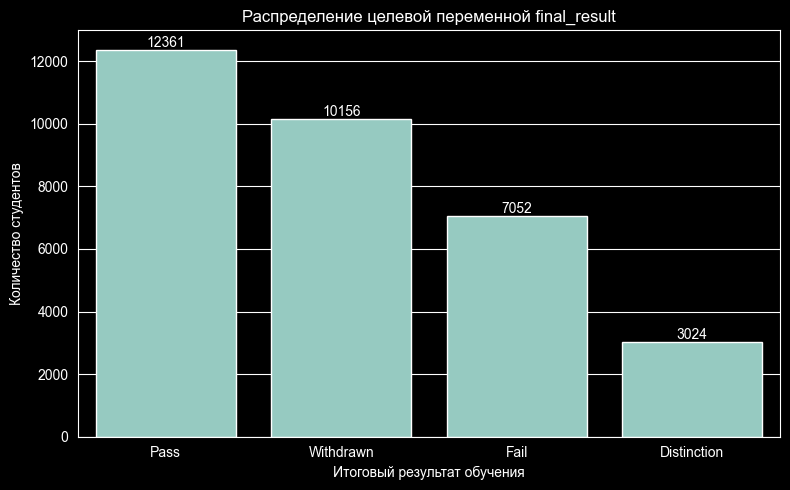

In [28]:
target_counts = df["final_result"].value_counts()

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="final_result",
    order=target_counts.index
)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Распределение целевой переменной final_result")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Количество студентов")
plt.tight_layout()
plt.show()

 ## 3.2 Демографические характеристики и результат обучения

В данном разделе анализируется связь между демографическими характеристиками студентов и итоговым результатом обучения.

Рассматриваются следующие признаки:
- пол (`gender`);
- уровень предыдущего образования (`highest_education`);
- возрастная группа (`age_band`).

Визуализации показывают различия в распределении итоговых результатов между демографическими группами.
Наблюдаемые различия могут указывать на потенциальные социально-демографические факторы, влияющие на успешность обучения.

Данный анализ важен не только для повышения качества предсказаний, но и для выявления возможных источников алгоритмической предвзятости.
Эти аспекты учитываются при интерпретации результатов моделей и обсуждении этических вопросов использования машинного обучения в образовательных системах.


In [29]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", fontsize=9)


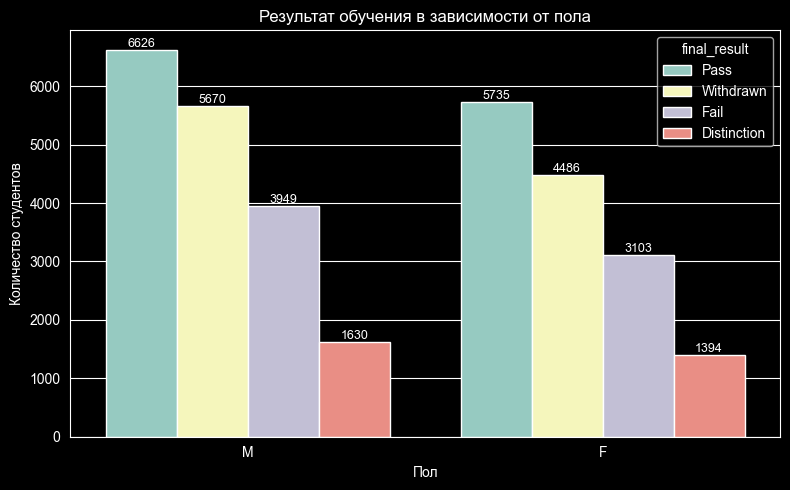

In [30]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="gender",
    hue="final_result"
)

add_labels(ax)

plt.title("Результат обучения в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Количество студентов")
plt.legend(title="final_result")
plt.tight_layout()
plt.show()


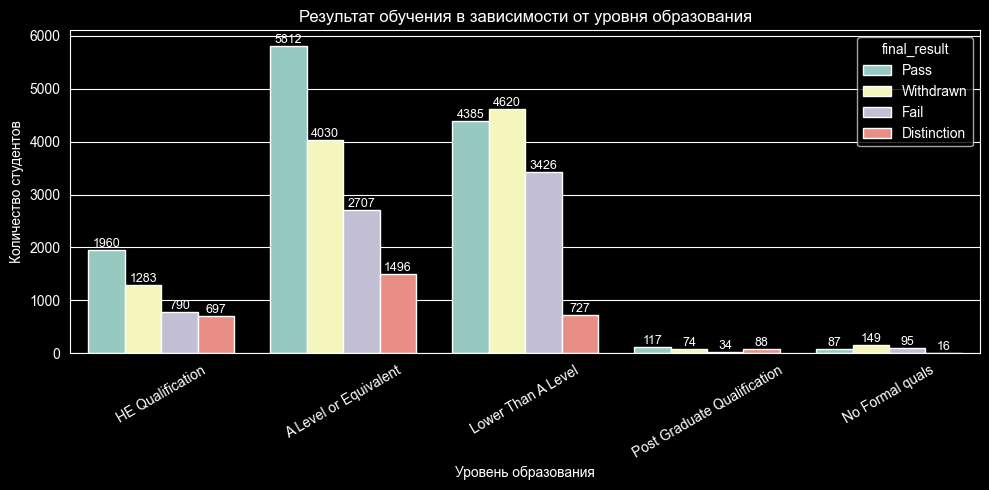

In [31]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    data=df,
    x="highest_education",
    hue="final_result"
)

add_labels(ax)

plt.title("Результат обучения в зависимости от уровня образования")
plt.xlabel("Уровень образования")
plt.ylabel("Количество студентов")
plt.xticks(rotation=30)
plt.legend(title="final_result")
plt.tight_layout()
plt.show()


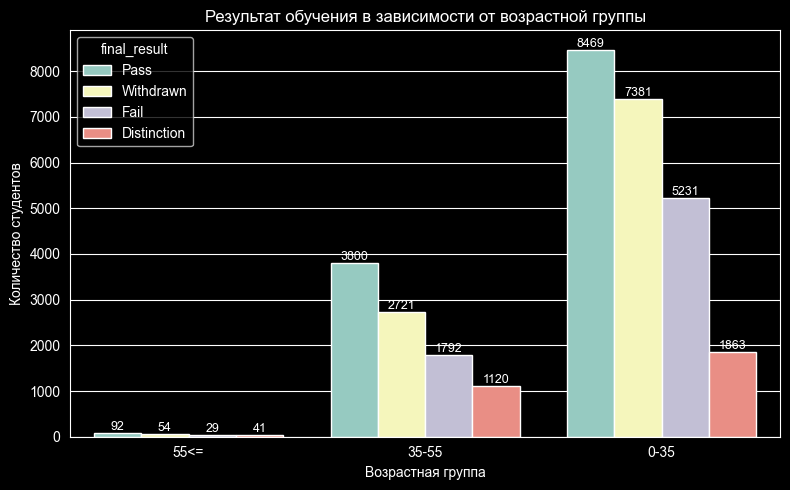

In [32]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="age_band",
    hue="final_result"
)

add_labels(ax)

plt.title("Результат обучения в зависимости от возрастной группы")
plt.xlabel("Возрастная группа")
plt.ylabel("Количество студентов")
plt.legend(title="final_result")
plt.tight_layout()
plt.show()


## 3.3 Активность студентов в виртуальной обучающей среде и результат обучения

В данном разделе анализируется связь между поведенческой активностью студентов в виртуальной обучающей среде (VLE) и итоговым результатом обучения.

Рассматриваются следующие признаки:
- общее количество кликов по учебным ресурсам (`total_clicks`);
- количество уникальных дней активности (`active_days`).

Boxplot-визуализации демонстрируют, что студенты с успешными результатами обучения, как правило, проявляют более высокий уровень активности и имеют большее число активных дней в системе.
В то же время для категорий неуспешного завершения курса наблюдается более низкий уровень вовлечённости.

Полученные результаты подтверждают, что показатели активности в VLE являются важными предикторами итогового результата обучения и должны быть включены в модель машинного обучения.


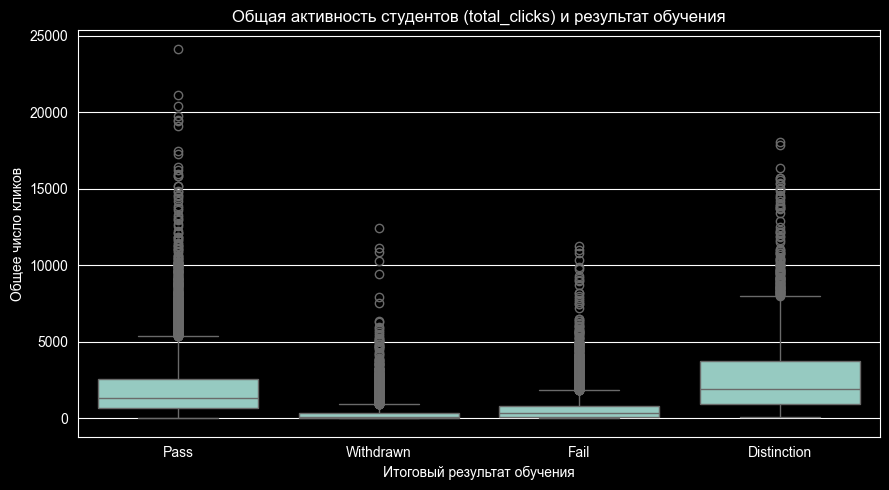

In [33]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x="final_result",
    y="total_clicks"
)
plt.title("Общая активность студентов (total_clicks) и результат обучения")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Общее число кликов")
plt.tight_layout()
plt.show()


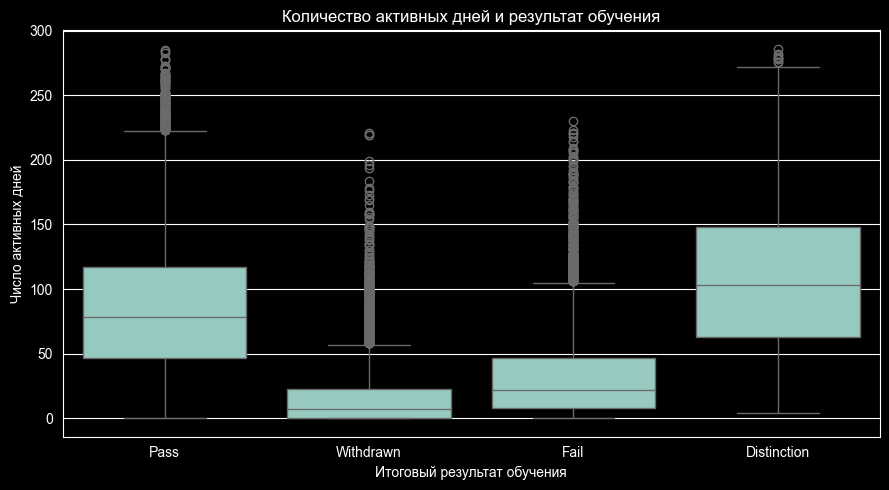

In [34]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x="final_result",
    y="active_days"
)
plt.title("Количество активных дней и результат обучения")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Число активных дней")
plt.tight_layout()
plt.show()


## 3.4 Академическая успеваемость и соблюдение сроков сдачи

В данном разделе анализируется связь между академическими показателями студентов и итоговым результатом обучения.

Рассматриваются следующие признаки:
- средний балл по заданиям (`mean_score`);
- общее количество сданных заданий (`submitted_count`);
- количество заданий, сданных с нарушением сроков (`late_submissions`).

Результаты визуального анализа показывают, что:
- более высокий средний балл и большее количество сданных заданий характерны для студентов с успешным завершением курса;
- увеличение числа просроченных сдач связано с более высоким риском неуспешного завершения обучения.

Данные признаки отражают академическую дисциплину и прогресс студентов и обладают высокой прогностической ценностью для задач раннего выявления студентов, находящихся в группе риска.


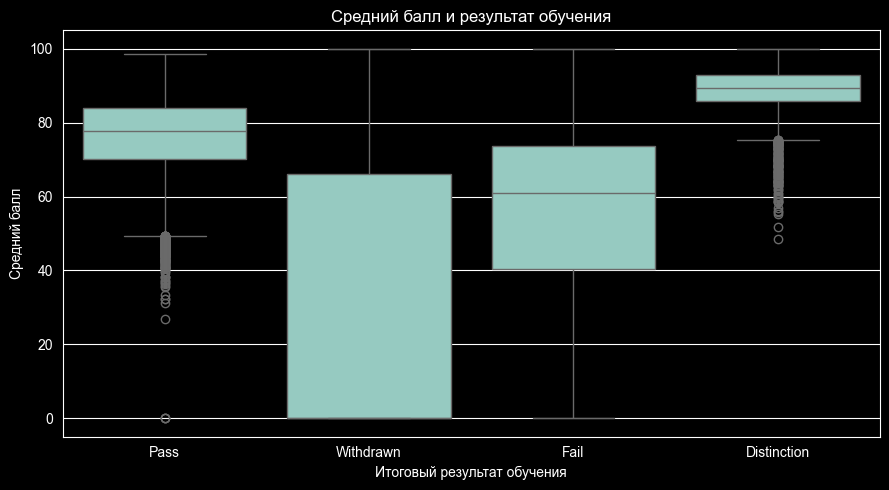

In [35]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x="final_result",
    y="mean_score"
)
plt.title("Средний балл и результат обучения")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Средний балл")
plt.tight_layout()
plt.show()


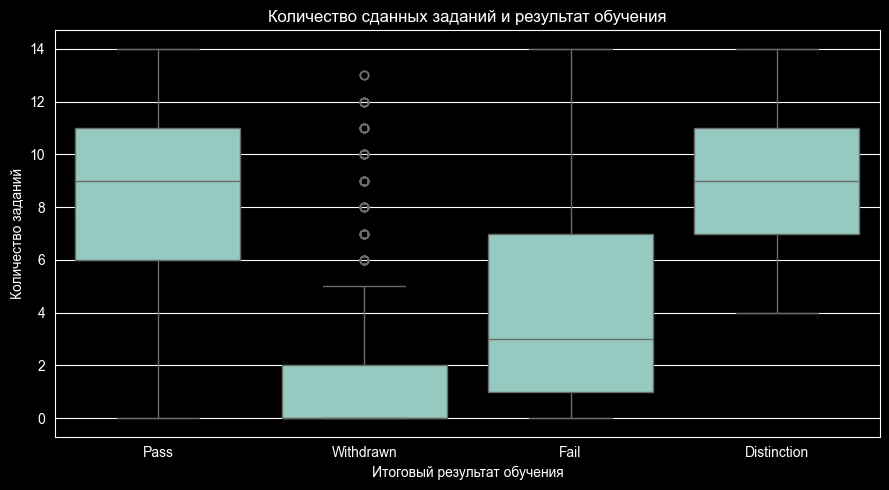

In [36]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x="final_result",
    y="submitted_count"
)
plt.title("Количество сданных заданий и результат обучения")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Количество заданий")
plt.tight_layout()
plt.show()


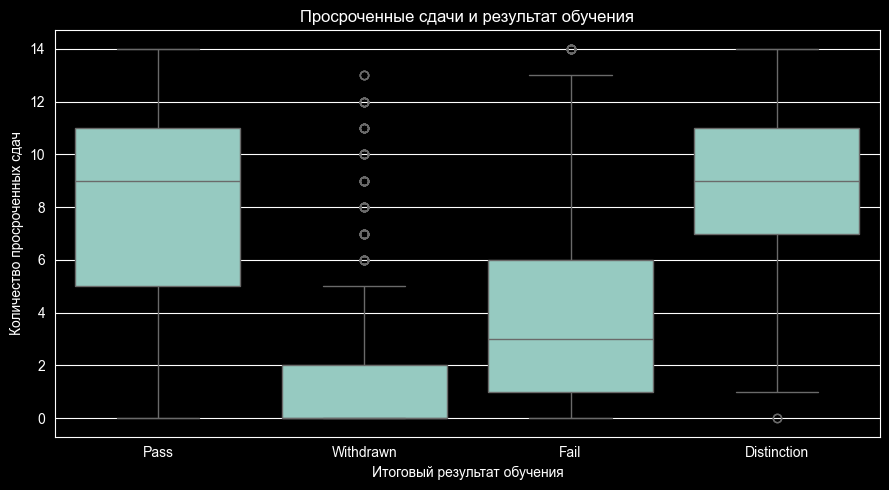

In [37]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    data=df,
    x="final_result",
    y="late_submissions"
)
plt.title("Просроченные сдачи и результат обучения")
plt.xlabel("Итоговый результат обучения")
plt.ylabel("Количество просроченных сдач")
plt.tight_layout()
plt.show()


## 3.5 Краткие выводы по разведочному анализу данных (EDA)

По результатам разведочного анализа были выявлены следующие ключевые закономерности.

Целевая переменная `final_result` имеет выраженный дисбаланс классов, что типично для образовательных данных. Это означает, что при построении моделей необходимо использовать метрики, устойчивые к дисбалансу (precision, recall, F1-score), а также применять специальные методы его компенсации.

Демографические характеристики студентов (пол, возрастная группа, уровень предыдущего образования) демонстрируют различия в распределении итоговых результатов. Хотя эти признаки не являются определяющими, они могут влиять на прогноз и требуют осторожной интерпретации с точки зрения алгоритмической справедливости и потенциальной предвзятости.

Показатели активности в виртуальной обучающей среде (общее число кликов и количество активных дней) имеют явную связь с результатом обучения. Более высокая вовлечённость характерна для студентов, успешно завершивших курс, что подтверждает важность поведенческих признаков для задачи раннего выявления студентов группы риска.

Академические показатели, такие как средний балл, количество сданных заданий и число просроченных сдач, демонстрируют наибольшую прогностическую ценность. Низкие оценки, малое число выполненных заданий и частые нарушения сроков напрямую связаны с неуспешным завершением обучения.

На основании проведённого EDA можно сделать вывод, что для построения модели машинного обучения целесообразно использовать комбинацию демографических, поведенческих и академических признаков. Полученные результаты обосновывают переход к этапу построения моделей классификации с использованием `Pipeline` и `ColumnTransformer`.


## 4. Подготовка данных к моделированию

На данном этапе данные подготавливаются к построению моделей машинного обучения.

Сначала формируется целевая переменная `y`, представляющая итоговый результат обучения студентов (`final_result`), и матрица признаков `X`, содержащая все остальные характеристики.

Далее признаки разделяются на:
- **числовые** — показатели активности, успеваемости и количественные характеристики;
- **категориальные** — демографические и категориальные признаки.

Такое разделение необходимо для корректной настройки `ColumnTransformer` на следующем этапе.

Затем данные разделяются на обучающую и тестовую выборки с использованием стратифицированного разбиения.
Стратификация по целевой переменной позволяет сохранить исходное распределение классов в обеих выборках, что особенно важно при наличии дисбаланса классов.

Подготовленные выборки используются далее для построения конвейера предобработки данных и обучения классификационных моделей.


In [38]:
# Целевая переменная
y = df["final_result"]

# Признаки (исключаем target)
X = df.drop(columns=["final_result"])


In [39]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_features, categorical_features


(['id_student',
  'num_of_prev_attempts',
  'studied_credits',
  'total_clicks',
  'mean_clicks',
  'active_days',
  'mean_score',
  'submitted_count',
  'late_submissions'],
 ['code_module',
  'code_presentation',
  'gender',
  'region',
  'highest_education',
  'imd_band',
  'age_band',
  'disability'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train.shape, X_test.shape


((26074, 17), (6519, 17))

## 5. Построение конвейера предобработки и базовой модели

На данном этапе создаётся единый конвейер машинного обучения с использованием `Pipeline` и `ColumnTransformer`.

Для предобработки данных используются:
- `StandardScaler` для масштабирования числовых признаков;
- `OneHotEncoder` для кодирования категориальных признаков с игнорированием неизвестных категорий.

`ColumnTransformer` позволяет применять разные методы предобработки к различным типам признаков в рамках одного конвейера, что обеспечивает корректную и воспроизводимую обработку данных.

В качестве базовой модели используется логистическая регрессия.
Параметр `class_weight="balanced"` применяется для компенсации дисбаланса классов целевой переменной.

Использование `Pipeline` гарантирует, что все этапы предобработки и обучения выполняются последовательно и одинаково как для обучающей, так и для тестовой выборки.


In [41]:
# Препроцессоры
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [42]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=RANDOM_STATE
    ))
])


              precision    recall  f1-score   support

 Distinction       0.42      0.82      0.56       605
        Fail       0.48      0.48      0.48      1411
        Pass       0.80      0.63      0.70      2472
   Withdrawn       0.77      0.76      0.76      2031

    accuracy                           0.65      6519
   macro avg       0.62      0.67      0.63      6519
weighted avg       0.69      0.65      0.66      6519



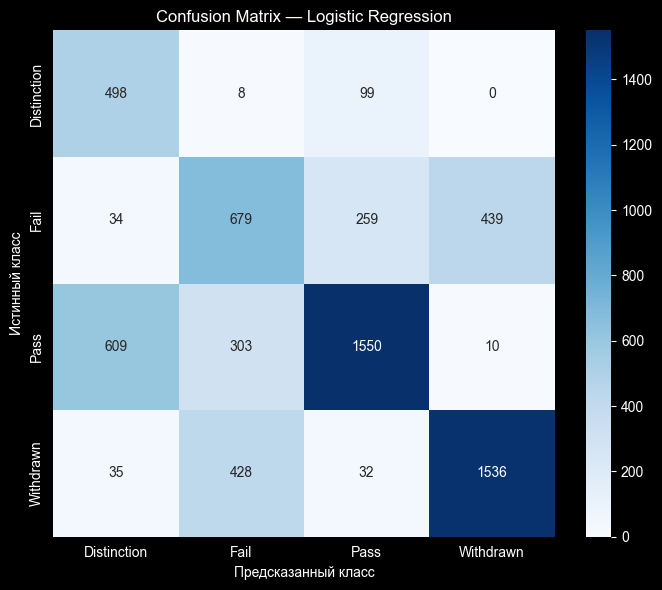

In [43]:
# Обучение
log_reg_pipeline.fit(X_train, y_train)

# Предсказание
y_pred = log_reg_pipeline.predict(X_test)

# Оценка
print(classification_report(y_test, y_pred))

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=log_reg_pipeline.classes_,
    yticklabels=log_reg_pipeline.classes_
)

plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.tight_layout()
plt.show()

## 6. Сравнение нескольких классификационных моделей

На данном этапе были реализованы три различных алгоритма классификации в рамках единого ML-конвейера:

- логистическая регрессия;
- случайный лес (Random Forest);
- градиентный бустинг (Gradient Boosting).

Все модели обучаются с использованием одного и того же `ColumnTransformer`, что обеспечивает корректное и честное сравнение их качества.

Для оценки используются метрики, устойчивые к дисбалансу классов, в частности F1-score с макро-усреднением.
Полученные результаты позволяют сравнить модели по их способности корректно классифицировать как основные, так и миноритарные классы.

На основании сравнительного анализа выбирается наиболее подходящая модель для дальнейшей настройки и интерпретации.


Random Forest
              precision    recall  f1-score   support

 Distinction       0.68      0.43      0.52       605
        Fail       0.57      0.33      0.42      1411
        Pass       0.74      0.92      0.82      2472
   Withdrawn       0.74      0.82      0.78      2031

    accuracy                           0.72      6519
   macro avg       0.68      0.62      0.64      6519
weighted avg       0.70      0.72      0.69      6519



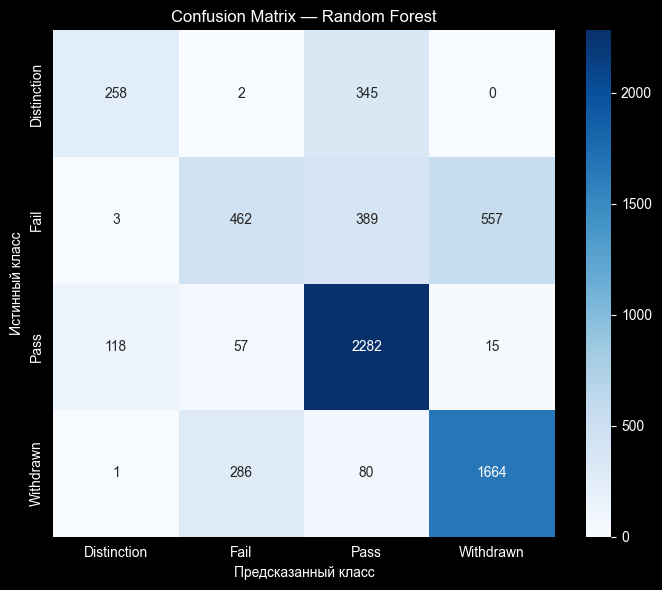

In [44]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=RANDOM_STATE,
        class_weight="balanced",
        n_jobs=-1
    ))
])

# Обучение
rf_pipeline.fit(X_train, y_train)

# Предсказание
y_pred_rf = rf_pipeline.predict(X_test)

# Оценка
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=log_reg_pipeline.classes_,
    yticklabels=log_reg_pipeline.classes_
)

plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.tight_layout()
plt.show()

Gradient Boosting
              precision    recall  f1-score   support

 Distinction       0.67      0.50      0.57       605
        Fail       0.60      0.38      0.46      1411
        Pass       0.76      0.91      0.83      2472
   Withdrawn       0.75      0.82      0.79      2031

    accuracy                           0.73      6519
   macro avg       0.70      0.65      0.66      6519
weighted avg       0.71      0.73      0.71      6519



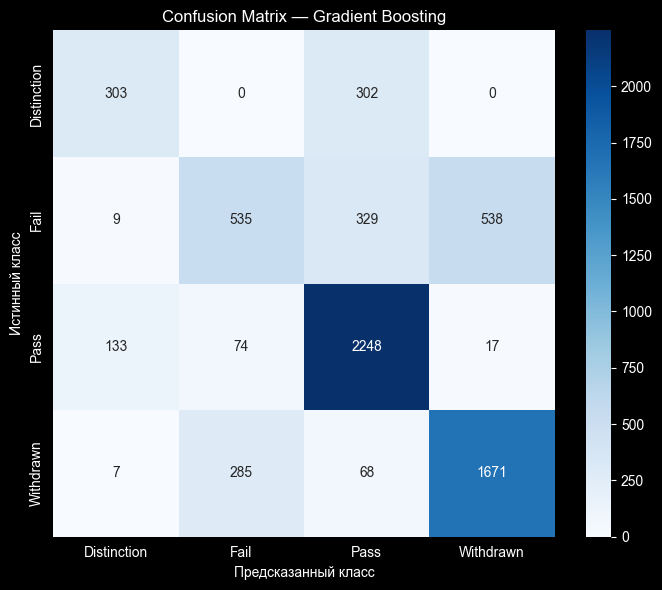

In [45]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        random_state=RANDOM_STATE
    ))
])

# Обучение
gb_pipeline.fit(X_train, y_train)

# Предсказание
y_pred_gb = gb_pipeline.predict(X_test)

# Оценка
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=log_reg_pipeline.classes_,
    yticklabels=log_reg_pipeline.classes_
)

plt.title("Confusion Matrix — Gradient Boosting")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.tight_layout()
plt.show()


In [46]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "F1_macro": [
        f1_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred_rf, average="macro"),
        f1_score(y_test, y_pred_gb, average="macro")
    ]
})

results


,Model,F1_macro
0,Logistic Regression,0.626709
1,Random Forest,0.635018
2,Gradient Boosting,0.663066


## 7. Настройка гиперпараметров модели

На данном этапе выполняется настройка гиперпараметров модели Random Forest с использованием `GridSearchCV`.

Поиск оптимальных параметров проводится:
- в рамках единого `Pipeline`, включающего предобработку данных;
- с использованием F1-score (macro) в качестве целевой метрики;
- с кросс-валидацией для повышения надёжности оценки.

После завершения подбора параметров выбирается лучшая модель, которая затем оценивается на тестовой выборке.
Сравнение показателей до и после настройки позволяет оценить вклад гиперпараметрического тюнинга в улучшение качества классификации, особенно для миноритарных классов.


In [47]:
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}


In [48]:
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   3.0s
[CV] END classifier__max_depth=No

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_leaf': [1, 2], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : th

In [49]:
grid_search.best_params_

{'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200}

Tuned Random Forest
              precision    recall  f1-score   support

 Distinction       0.57      0.66      0.61       605
        Fail       0.57      0.41      0.48      1411
        Pass       0.77      0.84      0.80      2472
   Withdrawn       0.76      0.79      0.78      2031

    accuracy                           0.72      6519
   macro avg       0.67      0.68      0.67      6519
weighted avg       0.71      0.72      0.71      6519



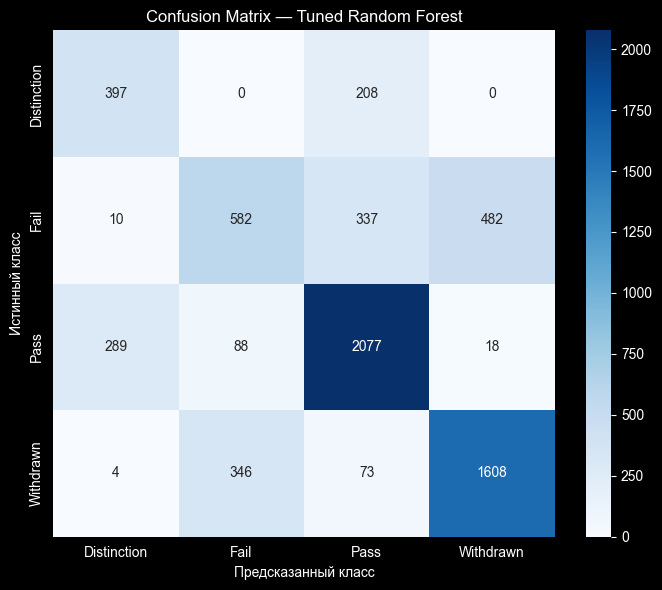

In [50]:
best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

print("Tuned Random Forest")
print(classification_report(y_test, y_pred_best))

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=log_reg_pipeline.classes_,
    yticklabels=log_reg_pipeline.classes_
)

plt.title("Confusion Matrix — Tuned Random Forest")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.tight_layout()
plt.show()


In [51]:
comparison = pd.DataFrame({
    "Model": ["Random Forest (baseline)", "Random Forest (tuned)"],
    "F1_macro": [
        f1_score(y_test, y_pred_rf, average="macro"),
        f1_score(y_test, y_pred_best, average="macro")
    ]
})

comparison


,Model,F1_macro
0,Random Forest (baseline),0.635018
1,Random Forest (tuned),0.667245


## 8. Интерпретация результатов и этические аспекты

### 8.1 Интерпретация результатов модели

Построенные модели машинного обучения продемонстрировали способность выявлять студентов с повышенным риском неуспешного завершения курса.
Наилучшие результаты показали ансамблевые методы, что ожидаемо для задач с нелинейными зависимостями и смешанными типами признаков.

Анализ метрик с макро-усреднением подтверждает, что модель учитывает как основные, так и миноритарные классы.
Это особенно важно в контексте образовательных данных, где ошибочная классификация студентов из группы риска может привести к упущенным возможностям для своевременного вмешательства.

Ключевыми предикторами результата обучения являются:
- показатели академической успеваемости (средний балл, количество сданных заданий);
- поведенческая активность в виртуальной обучающей среде;
- в меньшей степени — демографические характеристики.

---

### 8.2 Ограничения модели

Несмотря на полученные результаты, модель имеет ряд ограничений:
- используется прокси-датасет (OULAD), который может не полностью отражать реальные данные платформы Zentora;
- данные имеют выраженный дисбаланс классов, что усложняет обучение и интерпретацию;
- модель не учитывает качественные аспекты обучения, такие как мотивация или внешние обстоятельства.

Эти ограничения необходимо учитывать при интерпретации результатов и внедрении модели в реальную систему.

---

### 8.3 Этические и социальные аспекты

Использование ML-систем в онлайн-образовании связано с рядом этических вопросов.

Во-первых, существует риск алгоритмической предвзятости, особенно при использовании демографических признаков.
Модели могут непреднамеренно усиливать социальное неравенство, если их решения не анализируются с точки зрения справедливости.

Во-вторых, обработка данных студентов требует строгого соблюдения принципов конфиденциальности и защиты персональных данных.
Доступ к данным должен быть ограничен, а результаты моделей — использоваться исключительно в образовательных целях.

В-третьих, автоматизированные рекомендации не должны полностью заменять решения преподавателей.
Оптимальным является гибридный подход, при котором модель служит инструментом поддержки принятия решений, а окончательные действия остаются за человеком.

---

### 8.4 Практическая ценность для Zentora

Результаты данного проекта демонстрируют, что ML-модели могут быть эффективно использованы как часть системы раннего предупреждения.
Такая система позволяет:
- своевременно выявлять студентов, находящихся в группе риска;
- инициировать персонализированные вмешательства;
- оптимизировать распределение образовательных ресурсов.

Ответственное внедрение подобных систем может повысить успешность обучения студентов и улучшить качество онлайн-образовательных платформ.
